# import libiraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , RobustScaler
from category_encoders.binary import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
import joblib

In [2]:
#!pip install xgboost

In [3]:
#!pip install category-encoders

In [4]:
#!pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders

# reading data

In [5]:
df=pd.read_csv('zomato.csv')
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# cleaning data

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
#drop less importnt column
df.drop(['url','address','phone','menu_item','reviews_list'],axis=1,inplace=True)

In [10]:
#drop column has alot of nan
df.drop(['dish_liked'],axis=1,inplace=True)

In [11]:
#drop nan
df.dropna(how='any',inplace=True)


In [12]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [13]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [14]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7 /5,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [15]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# univariate analysis

In [16]:
df['name'].value_counts()

Cafe Coffee Day                   89
Onesta                            85
Empire Restaurant                 71
Five Star Chicken                 68
Kanti Sweets                      68
                                  ..
Pan's Aroma                        1
Shakthi Bar and Restaurant         1
Samrat Family Restaurant & Bar     1
Dil Se Punjabi                     1
SeeYa Restaurant                   1
Name: name, Length: 7112, dtype: int64

In [17]:
df['online_order'].value_counts()

Yes    28136
No     15311
Name: online_order, dtype: int64

In [18]:
df['book_table'].value_counts()

No     37047
Yes     6400
Name: book_table, dtype: int64

In [19]:
df['rate'].value_counts()

NEW       2192
3.9/5     2088
3.7/5     2006
3.8/5     1997
3.9 /5    1865
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [20]:
df['votes'].min(),df['votes'].max()

(0, 16832)

In [21]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [22]:
len(df['rest_type'].unique())

87

In [23]:
df['cuisines'].value_counts()

North Indian                                                           2241
North Indian, Chinese                                                  2029
South Indian                                                           1317
Bakery, Desserts                                                        642
Biryani                                                                 632
                                                                       ... 
Chinese, Bakery                                                           1
South Indian, Fast Food, Chinese                                          1
Asian, Continental, Healthy Food                                          1
South Indian, North Indian, Chinese, Desserts, Fast Food, Ice Cream       1
North Indian, Chinese, Arabian, Momos                                     1
Name: cuisines, Length: 2487, dtype: int64

In [24]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [25]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'list_type','listed_in(city)':'city'})

In [26]:
df['list_type'].value_counts()

Delivery              21605
Dine-out              14816
Desserts               2849
Cafes                  1589
Drinks & nightlife     1066
Buffet                  864
Pubs and bars           658
Name: list_type, dtype: int64

In [27]:
df['city'].value_counts()

BTM                      2745
Koramangala 7th Block    2474
Koramangala 5th Block    2374
Koramangala 4th Block    2352
Koramangala 6th Block    2252
Jayanagar                1993
JP Nagar                 1763
Indiranagar              1653
Church Street            1551
MG Road                  1550
Brigade Road             1536
Lavelle Road             1490
HSR                      1444
Residency Road           1377
Marathahalli             1345
Bannerghatta Road        1323
Brookefield              1249
Whitefield               1249
Old Airport Road         1225
Basavanagudi             1140
Kalyan Nagar             1068
Kammanahalli             1064
Sarjapur Road            1054
Bellandur                1026
Frazer Town               993
Malleshwaram              974
Electronic City           938
Rajajinagar               895
Banashankari              766
New BEL Road              584
Name: city, dtype: int64

In [28]:
df['location'].value_counts()

BTM                      4201
Koramangala 5th Block    2356
HSR                      2100
Indiranagar              1882
JP Nagar                 1841
                         ... 
West Bangalore              5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [29]:
len(df['location'].value_counts())

92

In [30]:
len(df['city'].value_counts())

30

In [31]:
len(df['cuisines'].value_counts())

2487

In [32]:
df['rate'].dtype

dtype('O')

In [33]:
 df['cuisines'].nunique()

2487

# preprocessing

In [34]:
df['rate'].unique().tolist()

['4.1/5',
 '3.8/5',
 '3.7/5',
 '3.6/5',
 '4.6/5',
 '4.0/5',
 '4.2/5',
 '3.9/5',
 '3.1/5',
 '3.0/5',
 '3.2/5',
 '3.3/5',
 '2.8/5',
 '4.4/5',
 '4.3/5',
 'NEW',
 '2.9/5',
 '3.5/5',
 '2.6/5',
 '3.8 /5',
 '3.4/5',
 '4.5/5',
 '2.5/5',
 '2.7/5',
 '4.7/5',
 '2.4/5',
 '2.2/5',
 '2.3/5',
 '3.4 /5',
 '-',
 '3.6 /5',
 '4.8/5',
 '3.9 /5',
 '4.2 /5',
 '4.0 /5',
 '4.1 /5',
 '3.7 /5',
 '3.1 /5',
 '2.9 /5',
 '3.3 /5',
 '2.8 /5',
 '3.5 /5',
 '2.7 /5',
 '2.5 /5',
 '3.2 /5',
 '2.6 /5',
 '4.5 /5',
 '4.3 /5',
 '4.4 /5',
 '4.9/5',
 '2.1/5',
 '2.0/5',
 '1.8/5',
 '4.6 /5',
 '4.9 /5',
 '3.0 /5',
 '4.8 /5',
 '2.3 /5',
 '4.7 /5',
 '2.4 /5',
 '2.1 /5',
 '2.2 /5',
 '2.0 /5',
 '1.8 /5']

In [35]:
df[df['rate']=='-']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,list_type,city
3068,House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400,Delivery,Basavanagudi
3373,Right Pizza,Yes,No,-,0,Basavanagudi,Quick Bites,Pizza,300,Dine-out,Basavanagudi
3378,Mezban Family Restaurant,Yes,No,-,0,Basavanagudi,Quick Bites,"Chinese, North Indian",300,Dine-out,Basavanagudi
3387,Mota Bawarchi,No,No,-,0,Basavanagudi,Quick Bites,"North Indian, Biryani, Fast Food",300,Dine-out,Basavanagudi
3396,Aahar Cafe,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100,Dine-out,Basavanagudi
...,...,...,...,...,...,...,...,...,...,...,...
33454,Deepam Tiffins,No,No,-,0,BTM,Quick Bites,"South Indian, North Indian, Chinese",300,Delivery,Koramangala 6th Block
33463,Hotel Orchid,No,No,-,0,BTM,Casual Dining,"North Indian, South Indian, Chinese, Kerala",500,Delivery,Koramangala 6th Block
45646,Sri Udupi,Yes,No,-,0,Old Airport Road,Quick Bites,"South Indian, North Indian, Chinese, Beverages",400,Dine-out,Old Airport Road
45647,Frozen Bite,Yes,No,-,0,Old Airport Road,Beverage Shop,Beverages,250,Dine-out,Old Airport Road


In [36]:
df[df['rate']=='NEW']

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,list_type,city
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery,Banashankari
110,Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,Delivery,Banashankari
130,Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,Delivery,Banashankari
131,Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51585,Wow Tiffin Food,No,No,NEW,0,Whitefield,Quick Bites,North Indian,200,Dine-out,Whitefield
51586,Quick Bites,Yes,No,NEW,0,Whitefield,Quick Bites,Chinese,200,Dine-out,Whitefield
51603,Shiv sagar,Yes,No,NEW,0,Whitefield,"Quick Bites, Food Court","South Indian, Chinese, North Indian",250,Dine-out,Whitefield
51604,Nawab Di Biryani,No,No,NEW,0,Whitefield,"Takeaway, Delivery","Biryani, Mughlai",400,Dine-out,Whitefield


In [37]:
df['rate']=df['rate'].replace({'-':np.nan,'NEW':np.nan})

df['rate'].isnull().sum()

2257

In [38]:
#SimpleImputer
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
df['rate'] = mode_imputer.fit_transform(df[['rate']])


In [39]:
df['rate'].isnull().sum()

0

In [40]:
df['rate'].astype(str)
df['rate']=df['rate'].apply(lambda x:x.replace('/5',''))
df['rate']=df['rate'].astype(float)

In [41]:
#feature extraction
def resturant(x):
    if x>3.7:
        return 1
    else:
        return 0
df['new_rate']=df['rate'].apply(lambda x:resturant(x))    

In [42]:
df['new_rate']

0        1
1        1
2        1
3        0
4        1
        ..
51709    0
51711    0
51712    0
51715    1
51716    0
Name: new_rate, Length: 43447, dtype: int64

In [43]:
df['cost'].unique().tolist()

['800',
 '300',
 '600',
 '700',
 '550',
 '500',
 '450',
 '650',
 '400',
 '900',
 '200',
 '750',
 '150',
 '850',
 '100',
 '1,200',
 '350',
 '250',
 '950',
 '1,000',
 '1,500',
 '1,300',
 '199',
 '80',
 '1,100',
 '160',
 '1,600',
 '230',
 '130',
 '1,700',
 '1,400',
 '1,350',
 '2,200',
 '2,000',
 '1,800',
 '1,900',
 '180',
 '330',
 '2,500',
 '2,100',
 '3,000',
 '2,800',
 '3,400',
 '50',
 '40',
 '1,250',
 '3,500',
 '4,000',
 '2,400',
 '2,600',
 '1,450',
 '70',
 '3,200',
 '560',
 '240',
 '360',
 '6,000',
 '1,050',
 '2,300',
 '4,100',
 '120',
 '5,000',
 '3,700',
 '1,650',
 '2,700',
 '4,500']

In [44]:
#for approx_cost(for two people)
df['cost']=df['cost'].astype(str)
df['cost']=df['cost'].apply(lambda x:x.replace(',',''))
df['cost']=df['cost'].astype(float)
df['cost']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51709     800.0
51711     800.0
51712    1500.0
51715    2500.0
51716    1500.0
Name: cost, Length: 43447, dtype: float64

# bivariate analysis

In [45]:
#top 10 rated resturants
df.groupby('name').mean()['rate'].sort_values(ascending=False).head(10)

name
Asia Kitchen By Mainland China                                                      4.900000
SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine    4.900000
Byg Brewski Brewing Company                                                         4.900000
Punjab Grill                                                                        4.871429
Belgian Waffle Factory                                                              4.844828
O.G. Variar & Sons                                                                  4.800000
Flechazo                                                                            4.800000
The Pizza Bakery                                                                    4.800000
AB's - Absolute Barbecues                                                           4.789474
CTR                                                                                 4.750000
Name: rate, dtype: float64

In [46]:
df['name']=df['name'].replace('SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine','Sant')

In [47]:
df.groupby('name').mean()['rate'].sort_values(ascending=False).head(10)

name
Asia Kitchen By Mainland China    4.900000
Sant                              4.900000
Byg Brewski Brewing Company       4.900000
Punjab Grill                      4.871429
Belgian Waffle Factory            4.844828
O.G. Variar & Sons                4.800000
Flechazo                          4.800000
The Pizza Bakery                  4.800000
AB's - Absolute Barbecues         4.789474
CTR                               4.750000
Name: rate, dtype: float64

In [48]:
#top10 voted resturant
df.groupby('name').sum()['votes'].sort_values(ascending=False).head(10)

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Name: votes, dtype: int64

In [49]:
#top10 resturant
df.groupby('name').sum()['cost'].sort_values(ascending=False).head(10
                                                                  )

name
Cafe Coffee Day        74800.0
Mainland China         74100.0
Barbeque Nation        65600.0
Hammered               59800.0
Toscano                56400.0
Banjara Melting Pot    56100.0
Sherlock's Pub         54100.0
Smoor                  51100.0
Onesta                 51000.0
Empire Restaurant      48650.0
Name: cost, dtype: float64

In [50]:
df[['location','city']]

,location,city
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51709,Whitefield,Whitefield
51711,Whitefield,Whitefield
51712,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [51]:
#5 location has online order
df[df['online_order']=='Yes']['location'].value_counts().head(5)

BTM                      3025
HSR                      1731
Koramangala 5th Block    1550
Indiranagar              1303
Jayanagar                1286
Name: location, dtype: int64

In [52]:
#5 city has no book table
df[df['book_table']=='No']['city'].value_counts().head(5)

BTM                      2367
Koramangala 7th Block    2095
Koramangala 5th Block    2014
Koramangala 4th Block    1987
Koramangala 6th Block    1923
Name: city, dtype: int64

# visualization

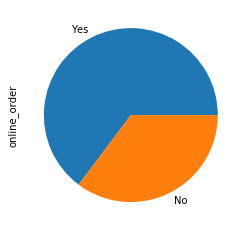

In [53]:

df['online_order'].value_counts().plot(kind='pie')

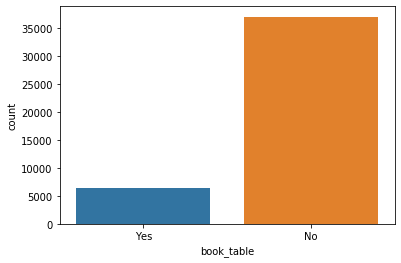

In [54]:
sns.countplot(data=df,x='book_table')

In [55]:
df['rate'].value_counts(normalize=True)*100

3.9    14.293277
3.8     8.783115
3.7     8.748590
3.6     7.554031
4.0     7.231800
4.1     6.725436
3.5     6.354869
3.4     5.622943
3.3     5.229360
4.2     4.950860
3.2     4.232743
4.3     3.859875
3.1     3.567565
4.4     2.614680
3.0     2.278638
2.9     1.841324
4.5     1.502981
2.8     1.334960
2.7     0.697401
4.6     0.688195
2.6     0.573112
4.7     0.384376
2.5     0.230165
2.4     0.151909
4.8     0.151909
4.9     0.126591
2.3     0.117384
2.2     0.059843
2.1     0.055240
2.0     0.025318
1.8     0.011508
Name: rate, dtype: float64

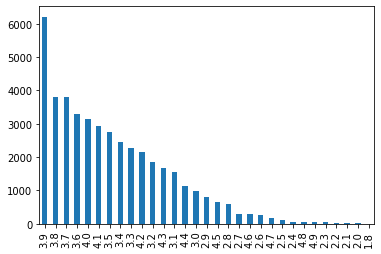

In [56]:
df['rate'].value_counts().plot(kind='bar')

In [57]:

#sns.set(rc={'figure.figsize':(15,8)})
#sns.kdeplot(data = df , x ="rate")

In [58]:
#sns.kdeplot(data = df , x ="votes")

In [59]:
#sns.kdeplot(data = df , x ="cost")

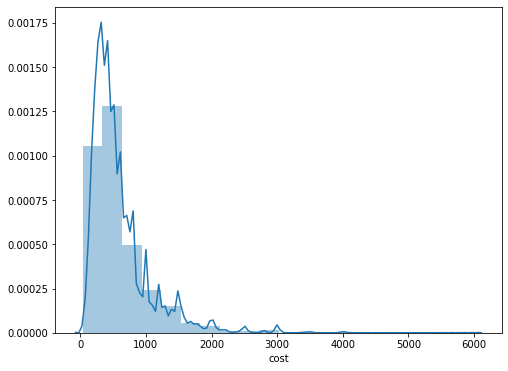

In [60]:
plt.figure(figsize=(8,6))
sns.distplot(df['cost'],bins=20)

In [61]:
df['location'].value_counts(normalize=True)*100

BTM                      9.669252
Koramangala 5th Block    5.422699
HSR                      4.833475
Indiranagar              4.331715
JP Nagar                 4.237347
                           ...   
West Bangalore           0.011508
Yelahanka                0.009207
Rajarajeshwari Nagar     0.004603
Nagarbhavi               0.002302
Peenya                   0.002302
Name: location, Length: 92, dtype: float64

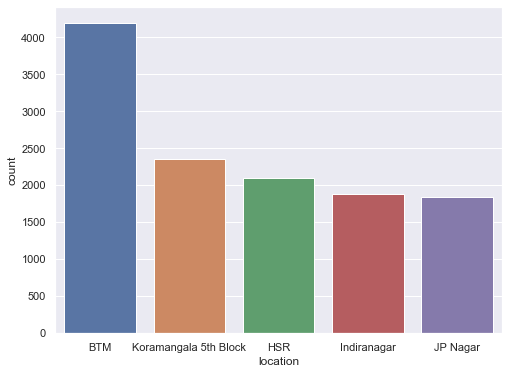

In [62]:
#top 5 location
sns.set(rc={'figure.figsize':(8,6)})
t5=df['location'].value_counts(normalize=True).head(5).index
sns.countplot(data=df,x='location',order=t5)

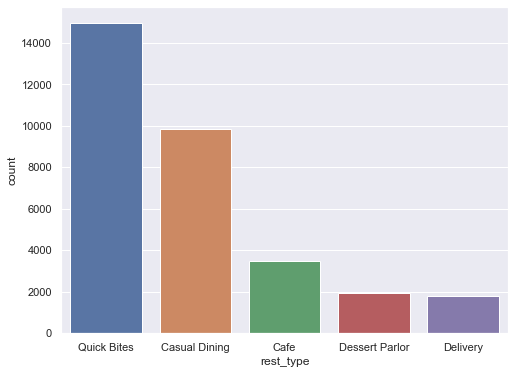

In [63]:
#top 5 rest_type
t5=df['rest_type'].value_counts(normalize=True).head(5).index
sns.countplot(data=df,x='rest_type',order=t5)

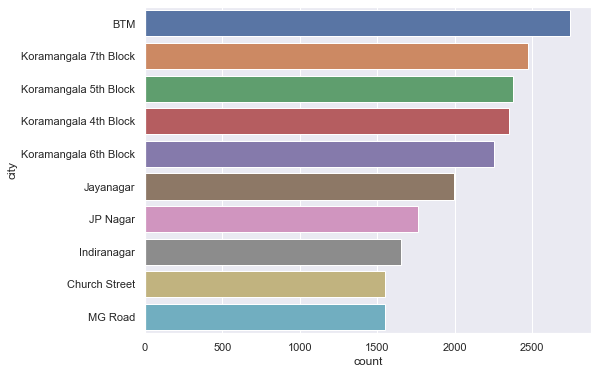

In [64]:
#top10 city
sns.set(rc={'figure.figsize':(8,6)})
t5=df['city'].value_counts().head(10).index
sns.countplot(data=df,y='city',order=t5)

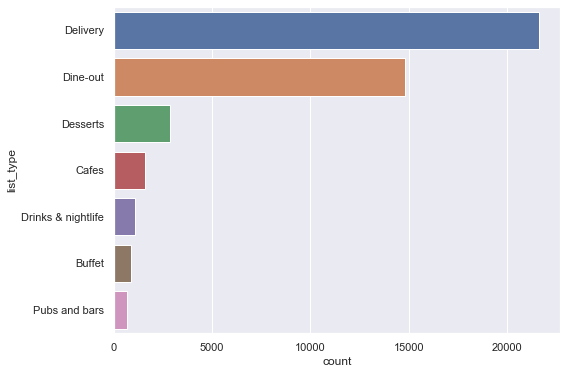

In [65]:
#top10 list_type
sns.set(rc={'figure.figsize':(8,6)})
t5=df['list_type'].value_counts().head(10).index
sns.countplot(data=df,y='list_type',order=t5)

In [66]:
#visual for 2 feature

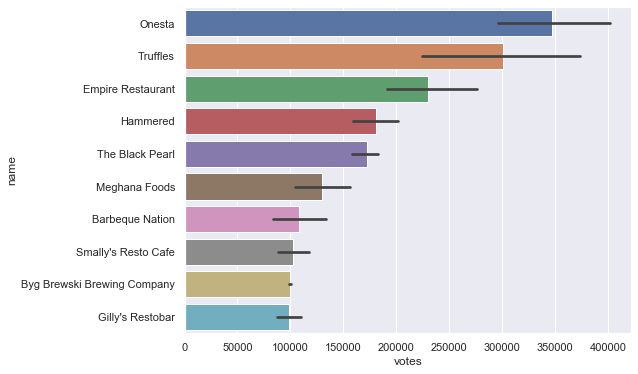

In [67]:
#top10 voted
t10=df.groupby(['name']).sum()['votes'].sort_values(ascending=False).head(10).index
sns.set(rc={'figure.figsize':(8,6)})
sns.barplot(data=df,y='name',x='votes',estimator=sum,order=t10)

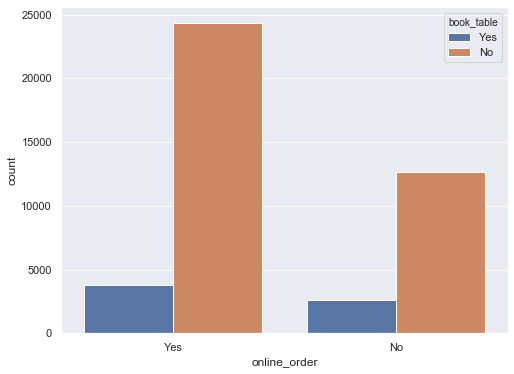

In [68]:
sns.countplot(data=df,x='online_order',hue='book_table')

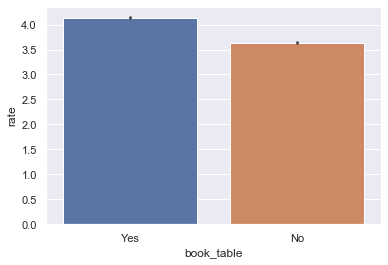

In [69]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=df,y="rate",x='book_table')

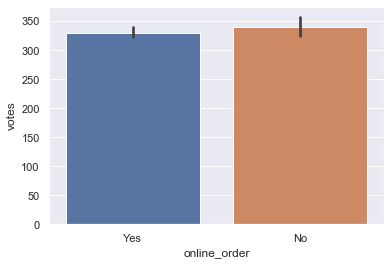

In [70]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=df,x='online_order',y='votes', ax=ax)

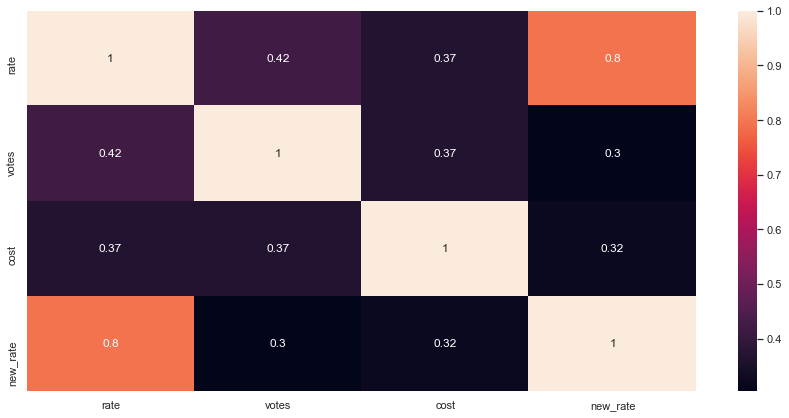

In [71]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

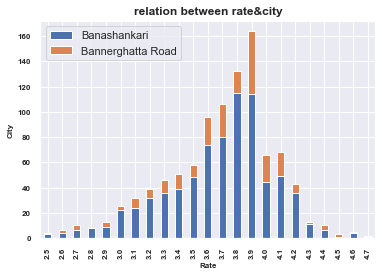

In [72]:
loc_plt=pd.crosstab(df['rate'],df['city'][:1000])
loc_plt.plot(kind='bar',stacked=True);
plt.title('relation between rate&city',fontsize=12,fontweight='bold')
plt.ylabel('City',fontsize=8,fontweight='bold')
plt.xlabel('Rate',fontsize=8,fontweight='bold')
plt.xticks(fontsize=8,fontweight='bold')
plt.yticks(fontsize=8,fontweight='bold');
plt.legend();

Text(0.5, 1.0, 'types of resturant')

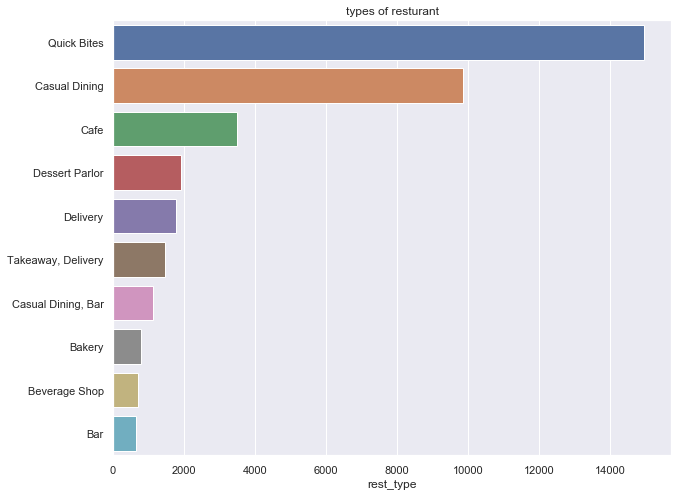

In [73]:
#the 10 most common types of resturants in banglore
plt.figure(figsize=(10,8))
x=df['rest_type'].value_counts()[:10]
sns.barplot(x,x.index)
plt.title("types of resturant")

# removing outliers

In [74]:
df.describe()

,rate,votes,cost,new_rate
count,43447.000000,43447.000000,43447.000000,43447.000000
mean,3.712031,333.777430,594.517826,0.513131
std,0.430603,863.748802,459.066707,0.499833
min,1.800000,0.000000,40.000000,0.000000
25%,3.400000,17.000000,300.000000,0.000000
50%,3.800000,64.000000,450.000000,1.000000
75%,4.000000,254.000000,700.000000,1.000000
max,4.900000,16832.000000,6000.000000,1.000000


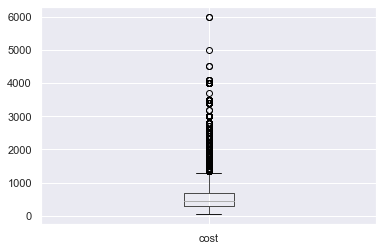

In [75]:
df.boxplot('cost')

In [76]:
#interquartile range
#for x in ['cost']:
#    q75,q25=np.percentile(df.loc[:,x],[75,25])
 #   iqr=q75-q25
#    max=q75+(1.5*iqr)
#    min=q25-(1.5*iqr)
#    df.loc[df[x]<min,x]=np.nan
#    df.loc[df[x]>max,x]=np.nan

In [77]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,list_type,city,new_rate
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield,0
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield,0
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield,0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield,1


In [78]:

for col in ['cost']:
    outliers=detect_outliers(df,0,[col])
    df.drop(outliers,inplace=True)
    print(len(outliers))

3198


In [79]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
list_type       0
city            0
new_rate        0
dtype: int64

In [80]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,list_type,city,new_rate
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,Whitefield,1
51706,Red Glow,No,No,3.7,27,Whitefield,Pub,"North Indian, Continental",1200.0,Pubs and bars,Whitefield,0
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield,0
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield,0


In [81]:
#preprocessing
df['rest_type']=df['rest_type'].apply(lambda c:len(c.split(',')))
df['cuisines']=df['cuisines'].apply(lambda c:len(c.split(',')))

In [82]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,list_type,city,new_rate
0,Jalsa,Yes,Yes,4.1,775,Banashankari,1,3,800.0,Buffet,Banashankari,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,1,3,800.0,Buffet,Banashankari,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,2,3,800.0,Buffet,Banashankari,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,1,2,300.0,Buffet,Banashankari,0
4,Grand Village,No,No,3.8,166,Basavanagudi,1,2,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,2,3,1200.0,Pubs and bars,Whitefield,1
51706,Red Glow,No,No,3.7,27,Whitefield,1,2,1200.0,Pubs and bars,Whitefield,0
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,2,3,1200.0,Pubs and bars,Whitefield,0
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,2,2,800.0,Pubs and bars,Whitefield,0


In [83]:
df['rest_type'].dtype

dtype('int64')

# building machine learning model

In [84]:
df.drop(['rate', 'name'] , axis = 1 , inplace = True)

In [85]:
df.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'list_type', 'city', 'new_rate'],
      dtype='object')

In [86]:
categorical=df.select_dtypes(include='object_')
numerical=df.select_dtypes(include='number')

In [87]:
for f in categorical.columns:
    print('category {} has {} values'.format(f,categorical[f].nunique()))

category online_order has 2 values
category book_table has 2 values
category location has 92 values
category list_type has 7 values
category city has 30 values


In [88]:
#location
loc=df['location'].value_counts(normalize=True)*100
loc

BTM                      10.387836
Koramangala 5th Block     5.304480
HSR                       5.152923
JP Nagar                  4.464707
Indiranagar               4.178986
                           ...    
Yelahanka                 0.009938
Sankey Road               0.007454
Rajarajeshwari Nagar      0.004969
Nagarbhavi                0.002485
Peenya                    0.002485
Name: location, Length: 92, dtype: float64

In [89]:
loc_values=loc.values

In [90]:
#put threshold
loc[loc_values>1]


BTM                      10.387836
Koramangala 5th Block     5.304480
HSR                       5.152923
JP Nagar                  4.464707
Indiranagar               4.178986
Jayanagar                 4.146687
Whitefield                3.669656
Marathahalli              3.475863
Bannerghatta Road         3.242317
Koramangala 6th Block     2.487018
Bellandur                 2.447266
Koramangala 7th Block     2.442297
Koramangala 1st Block     2.375214
Brigade Road              2.303163
Electronic City           2.231111
Banashankari              1.995081
Sarjapur Road             1.985142
Koramangala 4th Block     1.920545
Ulsoor                    1.786380
Kalyan Nagar              1.729236
Basavanagudi              1.545380
Malleshwaram              1.448483
Brookefield               1.421153
Frazer Town               1.403762
Richmond Road             1.274566
Kammanahalli              1.257174
New BEL Road              1.252205
MG Road                   1.212452
Church Street       

In [91]:
important_loc=loc[loc_values>1].index
important_loc

Index(['BTM', 'Koramangala 5th Block', 'HSR', 'JP Nagar', 'Indiranagar',
       'Jayanagar', 'Whitefield', 'Marathahalli', 'Bannerghatta Road',
       'Koramangala 6th Block', 'Bellandur', 'Koramangala 7th Block',
       'Koramangala 1st Block', 'Brigade Road', 'Electronic City',
       'Banashankari', 'Sarjapur Road', 'Koramangala 4th Block', 'Ulsoor',
       'Kalyan Nagar', 'Basavanagudi', 'Malleshwaram', 'Brookefield',
       'Frazer Town', 'Richmond Road', 'Kammanahalli', 'New BEL Road',
       'MG Road', 'Church Street', 'Banaswadi', 'Rajajinagar',
       'Residency Road', 'Cunningham Road'],
      dtype='object')

In [92]:
def locc(l):
    if l in important_loc:
        return l
    else:
        return 'not important'
df['location']=df['location'].apply(locc)    

In [93]:
df['location'].value_counts()

not important            6335
BTM                      4181
Koramangala 5th Block    2135
HSR                      2074
JP Nagar                 1797
Indiranagar              1682
Jayanagar                1669
Whitefield               1477
Marathahalli             1399
Bannerghatta Road        1305
Koramangala 6th Block    1001
Bellandur                 985
Koramangala 7th Block     983
Koramangala 1st Block     956
Brigade Road              927
Electronic City           898
Banashankari              803
Sarjapur Road             799
Koramangala 4th Block     773
Ulsoor                    719
Kalyan Nagar              696
Basavanagudi              622
Malleshwaram              583
Brookefield               572
Frazer Town               565
Richmond Road             513
Kammanahalli              506
New BEL Road              504
MG Road                   488
Church Street             483
Banaswadi                 482
Rajajinagar               474
Residency Road            453
Cunningham

In [94]:
df['list_type'].value_counts(normalize=True)*100

Delivery              52.232354
Dine-out              33.364804
Desserts               7.003901
Cafes                  3.865935
Drinks & nightlife     1.314318
Buffet                 1.262143
Pubs and bars          0.956546
Name: list_type, dtype: float64

In [95]:
for f in categorical.columns:
    print('category {} has {} values'.format(f,df[f].nunique()))

category online_order has 2 values
category book_table has 2 values
category location has 34 values
category list_type has 7 values
category city has 30 values


In [96]:
#encoding
Encoder=ColumnTransformer(transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),['online_order','book_table','list_type']),('BIN',BinaryEncoder(),['location','city'])],remainder='passthrough')

In [97]:
df

,online_order,book_table,votes,location,rest_type,cuisines,cost,list_type,city,new_rate
0,Yes,Yes,775,Banashankari,1,3,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,1,3,800.0,Buffet,Banashankari,1
2,Yes,No,918,Banashankari,2,3,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,1,2,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,1,2,600.0,Buffet,Banashankari,1
...,...,...,...,...,...,...,...,...,...,...
51705,Yes,Yes,128,Whitefield,2,3,1200.0,Pubs and bars,Whitefield,1
51706,No,No,27,Whitefield,1,2,1200.0,Pubs and bars,Whitefield,0
51708,No,No,161,Whitefield,2,3,1200.0,Pubs and bars,Whitefield,0
51709,No,No,34,Whitefield,2,2,800.0,Pubs and bars,Whitefield,0


In [98]:
x=df.drop('new_rate',axis=1)
y=df['new_rate']

In [99]:
models=list()
models.append(('logistic',LogisticRegression()))
models.append(('xg',XGBClassifier()))
models.append(('knn',KNeighborsClassifier()))
models.append(('random',RandomForestClassifier()))
models.append(('decision',DecisionTreeClassifier()))

In [100]:
for model in models:
    step=list()
    step.append(('encoder',Encoder))
    step.append(('scaler',RobustScaler()))
    step.append(model)
    pipeline=Pipeline(steps=step)
    scores = cross_validate(pipeline ,x, y, cv = 5 , scoring="accuracy" , return_train_score=True)
    print(model[0])
    print('train_accuracy',scores['train_score'].mean())
    print("-" * 4)
    print('test_accuracy',scores['test_score'].mean())
    print("-" * 20)
    print("\n")
    

logistic
train_accuracy 0.7329623164486223
----
test_accuracy 0.7306765749226978
--------------------


xg
train_accuracy 0.9156686541131347
----
test_accuracy 0.8506538908810863
--------------------


knn
train_accuracy 0.8295485529719201
----
test_accuracy 0.7471489425406034
--------------------


random
train_accuracy 0.9987577340756889
----
test_accuracy 0.8702321417960951
--------------------


decision
train_accuracy 0.9987639452558131
----
test_accuracy 0.8800706017259193
--------------------




In [101]:
#choose best mode
params = [
        {'random__criterion':['gini', 'entropy'], 'random__n_estimators': [100, 110, 120 , 130],'random__max_depth':[14,16] }
         ]


In [102]:
step = list()
step.append(('encoder',Encoder))
step.append(('scaler',RobustScaler()))
step.append(("random" , RandomForestClassifier()))
pipeline = Pipeline(steps = step)

In [103]:
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           scoring='accuracy',
                           cv=10,return_train_score=True, n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('encoder',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop='first',
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                 

In [104]:
grid_search.best_params_

{'random__criterion': 'gini',
 'random__max_depth': 16,
 'random__n_estimators': 130}

In [105]:
grid_search.cv_results_["mean_test_score"].mean()

0.8286446792845412

In [106]:
grid_search.cv_results_["mean_train_score"].mean()

0.9189144737323414

In [107]:
final_model = grid_search.best_estimator_

In [108]:
inputs = x.columns

In [109]:
inputs

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'cuisines', 'cost', 'list_type', 'city'],
      dtype='object')

In [110]:
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )

['Inputs.pkl']

In [111]:
df['votes'].min(),df['votes'].max()

(0, 14726)

In [112]:
df['cost'].min(),df['cost'].max()

(40.0, 1300.0)

In [113]:
df['cuisines'].unique()

array([3, 2, 1, 4, 5, 8, 7, 6], dtype=int64)

In [114]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [115]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd


Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")

def predict(online_order, book_table, votes, location, rest_type,cuisines, approx_cost, listed_in,listed_in_city):
    test_df = pd.DataFrame(columns = Inputs)
    test_df.at[0,"online_order"] = online_order
    test_df.at[0,"book_table"] = book_table
    test_df.at[0,"votes"] = votes
    test_df.at[0,"location"] = location
    test_df.at[0,"rest_type"] = rest_type
    test_df.at[0,"cost"] = approx_cost
    test_df.at[0,"cuisines"] = cuisines
    test_df.at[0,"list_type"] = listed_in
    test_df.at[0,"city"] = listed_in_city
    result = Model.predict(test_df)[0]
    return result
def main():
    st.title("Zomato Resturants Application")
    online_order = st.selectbox("online" , ['Yes', 'No'])
    book_table = st.selectbox("book_table" , ['Yes', 'No'])
    votes = st.slider("votes" , min_value=0, max_value=14726, value=0, step=1)
    location=st.selectbox('location',['Banashankari', 'Basavanagudi', 'not important', 'Jayanagar',
       'JP Nagar', 'Bannerghatta Road', 'BTM', 'Electronic City',
       'Koramangala 5th Block', 'Richmond Road', 'HSR', 'Marathahalli',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'Brigade Road', 'Church Street', 'Residency Road',
       'MG Road', 'Cunningham Road', 'Ulsoor', 'Kammanahalli',
       'Koramangala 6th Block', 'Brookefield', 'Koramangala 4th Block',
       'Rajajinagar', 'Banaswadi', 'Kalyan Nagar', 'New BEL Road',
       'Malleshwaram'])
    rest_type=st.selectbox("rest_type" , [1, 2])
    cuisines=st.selectbox("cuisines" , [3, 2, 1, 4, 5, 8, 7, 6])
    approx_cost=st.slider("cost" , min_value=40, max_value=13000, value=0, step=1)
    listed_in=st.selectbox("list_type" ,['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'])
    listed_in_city=st.selectbox("city" ,['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'])
    if st.button("Predict"):
        result = predict(online_order, book_table, votes, location, rest_type,cuisines, approx_cost, listed_in,listed_in_city)
        label = ["Fail","Success"]
        st.text("The output is {}".format(label[result]))
if __name__ == '__main__':
    main()
                                

Overwriting app.py
